In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [106]:
!ls

Histo Trafic 2012.csv
Histo Trafic 2013.csv
Histo Trafic 2014.csv
Histo Trafic 2015.csv
Histo Trafic 2016.csv
Histo Trafic 2017.csv
Histo Trafic 2018.csv
Untitled.ipynb
historique_concat.csv
historique_concat_2014_2015.csv
passagers_real_faisceau_jour_ad_2014_2015.csv
passagers_real_faisceau_jour_ad_2016_2017.csv


In [107]:
df = pd.read_csv('historique_concat.csv', sep=',', low_memory=False)

In [108]:
df.head()

,Unnamed: 0,Jour,Horaire théorique,Horaire bloc,Compagnie,Code IATA compagnie,Code OACI compagnie,Numéro de vol,Faisceau facturation,Pays,...,Plateforme,Plateforme code,Libellé plateforme,Aérogare,Libellé aérogare,Terminal,Libellé terminal,Nombre de mouvements réalisés,Nombre de vol atterris décollés,Nombre de passagers réalisés
0,0,2012/03/15 00:00:00,2012/03/15 15:30:00,2012/03/15 14:59:00,FEDEX,FX,FDX,FDX003,International,CHINE,...,CDG,CDG,Charles de Gaulle,CDGF,CDG FRET,CDGF,CDG FRET,1,1,0
1,1,2012/03/16 00:00:00,2012/03/16 13:55:00,2012/03/16 13:58:00,AIR FRANCE,AF,AFR,AF3540,International,DOMINICAINE (REPUBLIQUE),...,CDG,CDG,Charles de Gaulle,CDG2,CDG2,T2C,Terminal 2C,1,1,352
2,2,2012/03/12 00:00:00,2012/03/12 19:40:00,2012/03/12 20:19:00,AIR FRANCE,AF,AFR,AF5704,National,FRANCE,...,ORLY,ORY,Orly,ORYO,ORY OUEST,ORYW,ORY OUEST,1,1,70
3,3,2012/03/06 00:00:00,2012/03/06 21:10:00,2012/03/06 20:55:00,NIKI LUFTFAHRT GMBH,HG,NLY,HG8735,Schengen,AUTRICHE,...,CDG,CDG,Charles de Gaulle,CDG3,CDG3,T3,Terminal 3,1,1,62
4,4,2012/03/13 00:00:00,2012/03/12 00:25:00,2012/03/13 00:16:00,FEDEX,FX,FDX,FDX7028,National,FRANCE,...,CDG,CDG,Charles de Gaulle,CDGF,CDG FRET,CDGF,CDG FRET,1,1,0


In [25]:
#fig, ax = plt.subplots(figsize=(12,6))
#sns.heatmap(df.isnull(), cbar=False)
#plt.title('Complétude de la base, en blanc les valeurs manquantes')
print("Complétude totale en pourcentage de la base :", (1-df.isnull().sum().sum()/(len(df.index)*len(df.columns)))*100,'%')

Complétude totale en pourcentage de la base : 99.98223367438291 %


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714619 entries, 0 to 714618
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Jour                             714619 non-null  object
 1   Horaire théorique                714403 non-null  object
 2   Horaire bloc                     714619 non-null  object
 3   Compagnie                        714615 non-null  object
 4   Code IATA compagnie              711545 non-null  object
 5   Code OACI compagnie              714615 non-null  object
 6   Numéro de vol                    714619 non-null  object
 7   Faisceau facturation             714616 non-null  object
 8   Pays                             714619 non-null  object
 9   Ville                            714619 non-null  object
 10  Aéroport                         714619 non-null  object
 11  Code aéroport IATA               714619 non-null  object
 12  Code aéroport OA

In [76]:
pd.unique(df['Type avion'])

array(['330', '777', '737', '32S', '380', 'EMJ', 'ATR', 'M1F', '340',
       '75F', '73M', 'IL9', '787', '767', '77F', '73F', '76F', 'CRJ',
       '757', 'ARJ', '350', 'DH8', 'ATZ', 'BE1', 'ERJ', '747', 'AB3',
       'ATF', '146', 'ABF', 'CCJ', 'ATP', '310', 'EM2', 'CNJ', 'DFL',
       '717', '74F', '100', 'AWA', '14F', '33F', 'LOH', 'M80', 'CL3',
       'CCX', 'SU1', 'EPH', 'LRJ', 'GRJ', 'CSB', 'M11', '31F', 'G22',
       'HBA', 'BEC', 'BG5', 'PAG', 'F50', 'S20', 'P18', 'C17', 'D38',
       'SF3', 'EML', 'YK4', 'CL5', 'GR1', 'EC3', 'WWP', '727', 'CNA',
       'PL2', 'TU5', '707', 'NDE', 'SFF', 'JST', 'CS5', 'TBM', 'F70',
       'IL7', 'FRJ', 'NDH', 'DF8', 'A81', 'BG6', 'A4F', 'EC4', 'AGH',
       'KC5', 'T20', 'SWM', 'K01'], dtype=object)

In [109]:
df[['Type avion', 'Sous-type avion']].head()

,Type avion,Sous-type avion
0,M1F,M1F
1,747,744
2,CRJ,CR7
3,32S,320
4,APF,APF


# Essai de création de la base de référence sur l'année 2017

L'offre de sièges va dépendre du modèle de l'avion et de la compagnie aérienne qui module le nombre de sièges installés selon le fuselage. On va tenter d'établir une estimation de cette offre de sièges.

In [110]:
type_avion = df.groupby('Type avion')[['Nombre de passagers réalisés']].max()

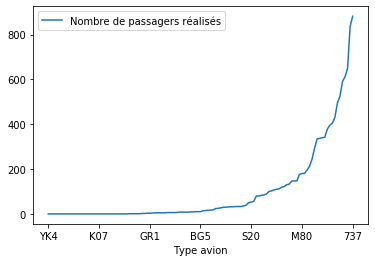

In [111]:
type_avion.sort_values(by='Nombre de passagers réalisés').plot()

In [174]:
cie_ta = df.groupby(['Type avion', 'Compagnie']).agg({'Nombre de mouvements réalisés':'sum', 'Nombre de vol atterris décollés': 'sum', 'Nombre de passagers réalisés':'max'})

In [175]:
cie_ta = cie_ta.rename(columns={'Nombre de passagers réalisés':'Nombre de passagers max réalisés'})

In [176]:
cie_ta.sort_values(by='Nombre de passagers max réalisés', ascending=False)

Nombre de mouvements réalisés  \
Type avion Compagnie                                             
737        TAROM                                          5392   
777        AIR FRANCE                                   229069   
380        THAI AIRWAYS INTL                              3980   
           EMIRATES                                      12394   
747        DELTA AIR LINES                                 448   
...                                                        ...   
CCX        JACKSON FAMILY WINES                              2   
           JET AVIATION FLIGHT                               4   
           MASTERJET AVIACAO                                 6   
           QATAR EXECUTIVE                                   2   
YK4        SLOVAK GOVERNMENT FL                              6   

                                 Nombre de vol atterris décollés  \
Type avion Compagnie                                               
737        TAROM                                            5392   
777        AIR FRANCE                                     229069   
380        THAI AIRWAYS INTL                                3980   
           EMIRATES                                        12394   
747        DELTA AIR LINES                                   448   
...                                                          ...   
CCX        JACKSON FAMILY WINES                                2   
           JET AVIATION FLIGHT                                 4   
           MASTERJET AVIACAO                                   6   
           QATAR EXECUTIVE                                     2   
YK4        SLOVAK GOVERNMENT FL                                6   

                                 Nombre de passagers max réalisés  
Type avion Compagnie                                               
737        TAROM                                              882  
777        AIR FRANCE                                         836  
380        THAI AIRWAYS INTL                                  650  
           EMIRATES                                           615  
747        DELTA AIR LINES                                    612  
...                                                           ...  
CCX        JACKSON FAMILY WINES                                 0  
           JET AVIATION FLIGHT                                  0  
           MASTERJET AVIACAO                                    0  
           QATAR EXECUTIVE                                      0  
YK4        SLOVAK GOVERNMENT FL                                 0  

[2350 rows x 3 columns]

In [177]:
df_test= df.groupby(['Type avion', 'Compagnie'])['Nombre de passagers réalisés'].mean()

In [178]:
cie_ta['Nombre de passagers réalisés moyen']=df_test

In [180]:
cie_ta.sort_values(by='Nombre de passagers max réalisés', ascending=False)

Nombre de mouvements réalisés  \
Type avion Compagnie                                             
737        TAROM                                          5392   
777        AIR FRANCE                                   229069   
380        THAI AIRWAYS INTL                              3980   
           EMIRATES                                      12394   
747        DELTA AIR LINES                                 448   
...                                                        ...   
CCX        JACKSON FAMILY WINES                              2   
           JET AVIATION FLIGHT                               4   
           MASTERJET AVIACAO                                 6   
           QATAR EXECUTIVE                                   2   
YK4        SLOVAK GOVERNMENT FL                              6   

                                 Nombre de vol atterris décollés  \
Type avion Compagnie                                               
737        TAROM                                            5392   
777        AIR FRANCE                                     229069   
380        THAI AIRWAYS INTL                                3980   
           EMIRATES                                        12394   
747        DELTA AIR LINES                                   448   
...                                                          ...   
CCX        JACKSON FAMILY WINES                                2   
           JET AVIATION FLIGHT                                 4   
           MASTERJET AVIACAO                                   6   
           QATAR EXECUTIVE                                     2   
YK4        SLOVAK GOVERNMENT FL                                6   

                                 Nombre de passagers max réalisés  \
Type avion Compagnie                                                
737        TAROM                                              882   
777        AIR FRANCE                                         836   
380        THAI AIRWAYS INTL                                  650   
           EMIRATES                                           615   
747        DELTA AIR LINES                                    612   
...                                                           ...   
CCX        JACKSON FAMILY WINES                                 0   
           JET AVIATION FLIGHT                                  0   
           MASTERJET AVIACAO                                    0   
           QATAR EXECUTIVE                                      0   
YK4        SLOVAK GOVERNMENT FL                                 0   

                                 Nombre de passagers réalisés moyen  
Type avion Compagnie                                                 
737        TAROM                                          93.295438  
777        AIR FRANCE                                    294.476428  
380        THAI AIRWAYS INTL                             399.633417  
           EMIRATES                                      442.691948  
747        DELTA AIR LINES                               318.102679  
...                                                             ...  
CCX        JACKSON FAMILY WINES                            0.000000  
           JET AVIATION FLIGHT                             0.000000  
           MASTERJET AVIACAO                               0.000000  
           QATAR EXECUTIVE                                 0.000000  
YK4        SLOVAK GOVERNMENT FL                            0.000000  

[2350 rows x 4 columns]

In [181]:
cie_ta.to_csv('base_ref.csv')

In [128]:
ta =pd.DataFrame()
ta['cap_moy'] = cie_ta.groupby('Type avion')['Nombre de passagers réalisés'].mean()
ta['cap_max']=cie_ta.groupby('Type avion')['Nombre de passagers réalisés'].max()

In [130]:
ta = ta.sort_values(by='cap_max')
ta

,cap_moy,cap_max
Type avion,,
YK4,0.000000,0
75F,0.000000,0
BNI,0.000000,0
K03,0.000000,0
K01,0.000000,0
...,...,...
330,241.401961,591
747,223.333333,612
380,473.272727,650


Recherche internet sur la cohérence des chiffres par type avion : 
- A340 correspondant à 340 https://fr.wikipedia.org/wiki/Airbus_A340#A340-200 jusqu'à 475 sièges en pleine capacité. 
- B777 correspondant à 777 https://en.wikipedia.org/wiki/Boeing_777#Variants autour de 434 capacité siège max selon le fuselage. 
- A330 correspondant à 330 https://fr.wikipedia.org/wiki/Airbus_A330#Caract%C3%A9ristiques_techniques 440 sièges max autorisés
- A380 correspondant à 380 http://airbus.com/aircraft/passenger-aircraft/a380/innovation.html autour de 550 capacité siège max

In [131]:
cie = cie_ta.groupby('Compagnie').agg({'Nombre de passagers réalisés': 'mean'})

In [132]:
cie = cie.sort_values(by='Nombre de passagers réalisés')
cie

,Nombre de passagers réalisés
Compagnie,
GARUDA INDONESIA AIR,0.000000
GAMA AVIATION SA,0.000000
GAMA AVIATION FZE,0.000000
GAINJET IRELAND,0.000000
G-OPS EUROPE,0.000000
...,...
TAROM,449.333333
DELTA AIR LINES,461.200000
PULLMANTUR AIR S.A.,467.500000


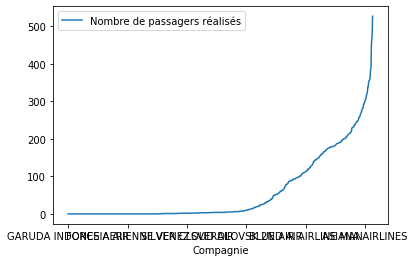

In [134]:
cie.sort_values(by="Nombre de passagers réalisés").plot()

In [16]:
#df_2 = df.groupby(['Jour', 'Faisceau facturation', 'Type de mouvement'])['Nombre de passagers réalisés'].sum()

In [17]:
#df_2.to_csv('passagers_real_faisceau_jour_ad_2014_2015.csv')